In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [12]:





data=pd.read_csv("parkinsons.data")
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [9]:
data.isnull().sum()

letter    0
x-box     0
y-box     0
width     0
height    0
onpix     0
x-bar     0
y-bar     0
x2bar     0
y2bar     0
xybar     0
x2ybr     0
xy2br     0
x-ege     0
xegvy     0
y-ege     0
yegvx     0
dtype: int64

In [13]:

X = data.drop(columns=["status"])
y = data["status"]
label_encoder = LabelEncoder()
X["name"] = label_encoder.fit_transform(X["name"])

In [14]:
# Preprocessing
# Encoding categorical variables
label_encoder = LabelEncoder()
y= label_encoder.fit_transform(y)

In [15]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Define the Classification model
classification_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])


C:\Users\Sabesh Rajan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compile the model
classification_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = classification_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.5650 - loss: 0.6932 - val_accuracy: 0.7949 - val_loss: 0.6624
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7461 - loss: 0.6370 - val_accuracy: 0.8462 - val_loss: 0.6303
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7950 - loss: 0.5823 - val_accuracy: 0.8718 - val_loss: 0.5983
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8242 - loss: 0.5514 - val_accuracy: 0.8974 - val_loss: 0.5627
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8797 - loss: 0.4859 - val_accuracy: 0.8974 - val_loss: 0.5305
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8567 - loss: 0.4663 - val_accuracy: 0.8718 - val_loss: 0.4982
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8853 - loss: 0.4270 - val_accuracy: 0.8718 - val_loss: 0.4687
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8467 - loss: 0.4032 - val_accuracy: 0.8718 - val_loss:

Epoch 52/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0166 - val_accuracy: 0.9231 - val_loss: 0.4388
Epoch 53/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0127 - val_accuracy: 0.9231 - val_loss: 0.4385
Epoch 54/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0146 - val_accuracy: 0.9231 - val_loss: 0.4449
Epoch 55/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0132 - val_accuracy: 0.9231 - val_loss: 0.4484
Epoch 56/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0120 - val_accuracy: 0.9231 - val_loss: 0.4546
Epoch 57/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0116 - val_accuracy: 0.9231 - val_loss: 0.4578
Epoch 58/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0100 - val_accuracy: 0.9231 - val_loss: 0.4637
Epoch 59/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0115 - val_accuracy: 0.9231 - v

C:\Users\Sabesh Rajan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


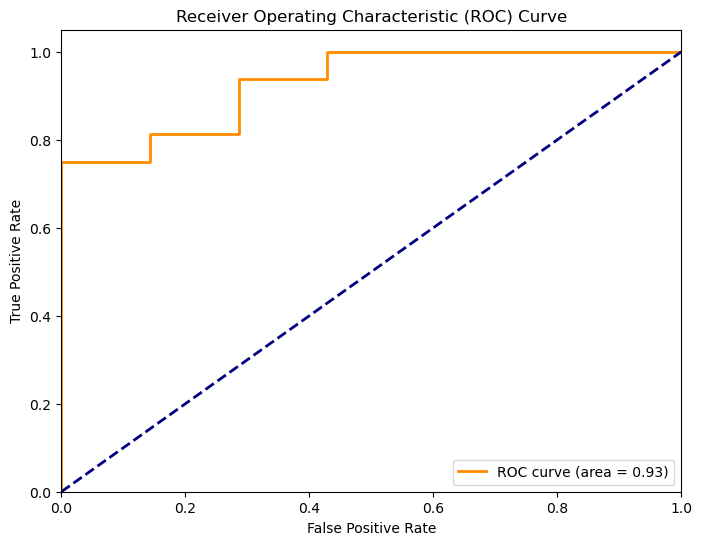

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Train logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict probabilities
probs = classifier.predict_proba(X_test)
preds = probs[:,1]

# Calculate ROC curve and AUC
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [25]:
# Evaluate the model on the testing set
loss, accuracy = classification_model.evaluate(X_test_scaled, y_test)
print("Classification Loss:", loss)
print("Classification Accuracy:", accuracy)

# Compute AUC score

# Generate confusion matrix
y_pred = np.round(prob)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("")
print("Classification Report:")
print(classification_report(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9279 - loss: 0.4454 
Classification Loss: 0.5950480699539185
Classification Accuracy: 0.9230769276618958

Classification Report:


ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

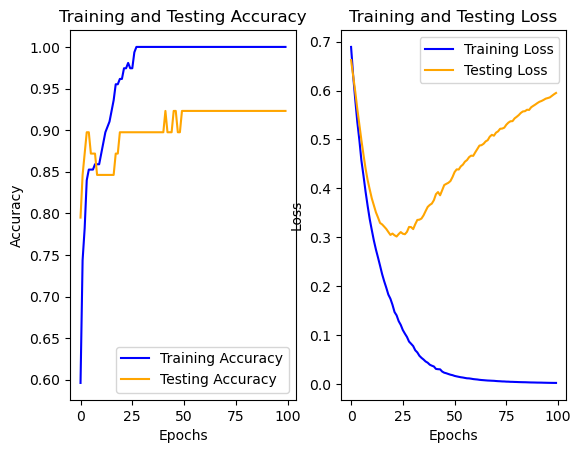

<Figure size 1200x600 with 0 Axes>

In [26]:
# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy', color='orange')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Plot training and testing accuracy and loss
plt.figure(figsize=(12, 6))
plt.tight_layout()
plt.show()

## L1 Regularization

In [27]:
# Regularization strength
lambda_val = 0.001

In [28]:
# Define the feedforward neural network model with L1 regularization
model_l1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=regularizers.l1(lambda_val)),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l1(lambda_val)),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l1(lambda_val)),
    Dense(1, activation='sigmoid')
])

# Compile the model with L1 regularization
model_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with L1 regularization
history_l1 = model_l1.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))


Epoch 1/100


C:\Users\Sabesh Rajan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.3148 - loss: 6.9077 - val_accuracy: 0.3077 - val_loss: 1.2455
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7013 - loss: 1.7054 - val_accuracy: 0.4103 - val_loss: 1.2295
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7191 - loss: 1.4336 - val_accuracy: 0.4359 - val_loss: 1.2186
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5228 - loss: 1.3957 - val_accuracy: 0.4872 - val_loss: 1.2046
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7024 - loss: 1.1626 - val_accuracy: 0.5641 - val_loss: 1.1914
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7436 - loss: 1.1069 - val_accuracy: 0.5897 - val_loss: 1.1808
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7621 - loss: 1.0574 - val_accuracy: 0.6154 - val_loss: 1.1685
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7305 - loss: 1.0100 - val_accuracy: 0.6154 - val_loss: 1.1566
Epoc

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8541 - loss: 0.5359 - val_accuracy: 0.8974 - val_loss: 0.8847
Epoch 53/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9220 - loss: 0.4902 - val_accuracy: 0.8974 - val_loss: 0.8840
Epoch 54/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9367 - loss: 0.4964 - val_accuracy: 0.8974 - val_loss: 0.8824
Epoch 55/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8777 - loss: 0.5056 - val_accuracy: 0.8974 - val_loss: 0.8817
Epoch 56/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8811 - loss: 0.5345 - val_accuracy: 0.8718 - val_loss: 0.8804
Epoch 57/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9207 - loss: 0.4786 - val_accuracy: 0.8974 - val_loss: 0.8797
Epoch 58/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9279 - loss: 0.4946 - val_accuracy: 0.8718 - val_loss: 0.8786
Epoch 59/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8817 - loss: 0.4932 - val_accuracy: 0.8718 - val_loss: 0.87

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


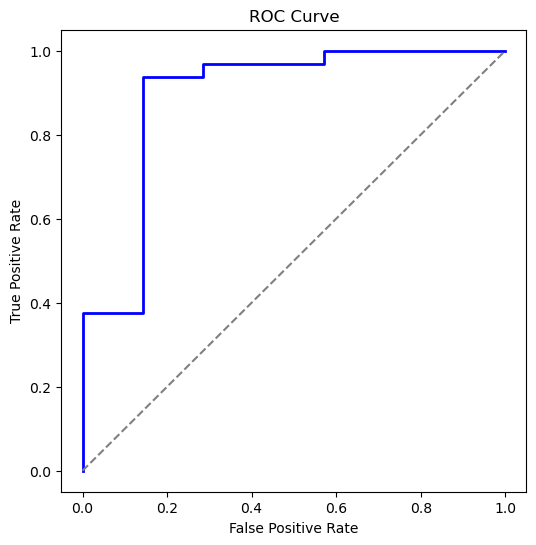

In [29]:
# Generate ROC curve
y_pred_prob = model_l1.predict(X_test_scaled).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

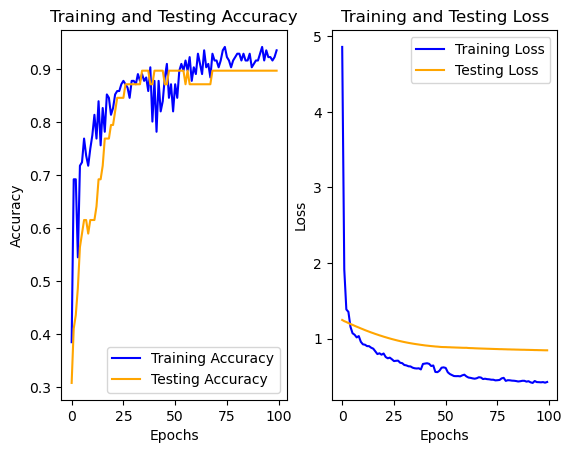

<Figure size 1200x600 with 0 Axes>

In [30]:
# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history_l1.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_l1.history['val_accuracy'], label='Testing Accuracy', color='orange')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history_l1.history['loss'], label='Training Loss', color='blue')
plt.plot(history_l1.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Plot training and testing accuracy and loss
plt.figure(figsize=(12, 6))
plt.tight_layout()
plt.show()

In [31]:
# Evaluate the model on the testing set
loss, accuracy = model_l1.evaluate(X_test_scaled, y_test)
print("Classification Loss:", loss)
print("Classification Accuracy:", accuracy)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC Score:", auc_score)

# Generate confusion matrix
y_pred = np.round(y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("")
print("Classification Report:")
print(classification_report(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9004 - loss: 0.8407
Classification Loss: 0.8437925577163696
Classification Accuracy: 0.8974359035491943
AUC Score: 0.8928571428571428
Confusion Matrix:
[[ 3  4]
 [ 0 32]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



## L2 Regularization

In [32]:
# Define the feedforward neural network model with L2 regularization
model_l2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=regularizers.l2(lambda_val)),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(lambda_val)),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(lambda_val)),
    Dense(1, activation='sigmoid')
])

# Compile the model with L2 regularization
model_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with L2 regularization
history_l2 = model_l2.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))

Epoch 1/100


C:\Users\Sabesh Rajan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.2586 - loss: 7.1688 - val_accuracy: 0.3333 - val_loss: 0.8053
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4611 - loss: 1.6725 - val_accuracy: 0.3846 - val_loss: 0.7915
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7379 - loss: 1.3615 - val_accuracy: 0.4103 - val_loss: 0.7855
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7109 - loss: 1.1180 - val_accuracy: 0.4359 - val_loss: 0.7816
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6828 - loss: 0.8761 - val_accuracy: 0.4359 - val_loss: 0.7769
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6851 - loss: 0.8230 - val_accuracy: 0.4872 - val_loss: 0.7716
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7236 - loss: 0.6249 - val_accuracy: 0.5385 - val_loss: 0.7665
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8153 - loss: 0.5516 - val_accuracy: 0.5641 - val_loss: 0.7629
Epo

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9003 - loss: 0.2824 - val_accuracy: 0.7179 - val_loss: 0.7042
Epoch 53/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9202 - loss: 0.2545 - val_accuracy: 0.7179 - val_loss: 0.7036
Epoch 54/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9133 - loss: 0.2901 - val_accuracy: 0.7179 - val_loss: 0.7029
Epoch 55/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8734 - loss: 0.2899 - val_accuracy: 0.7179 - val_loss: 0.7023
Epoch 56/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9003 - loss: 0.2656 - val_accuracy: 0.7179 - val_loss: 0.7020
Epoch 57/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8972 - loss: 0.2672 - val_accuracy: 0.7179 - val_loss: 0.7014
Epoch 58/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9003 - loss: 0.2572 - val_accuracy: 0.7179 - val_loss: 0.7007
Epoch 59/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8794 - loss: 0.2846 - val_accuracy: 0.7179 - val_loss: 0.70

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


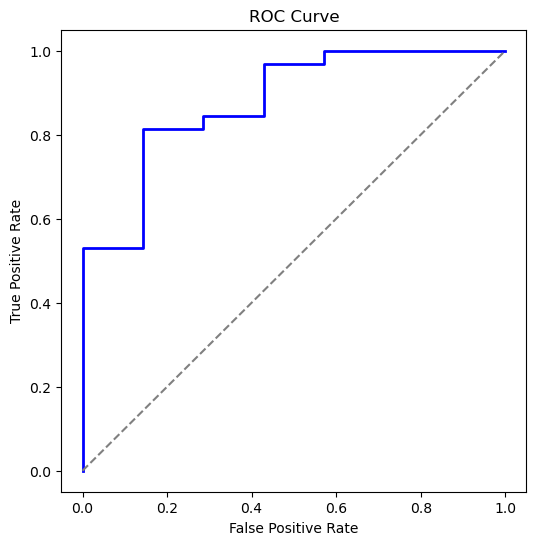

In [33]:
# Generate ROC curve
y_pred_prob = model_l2.predict(X_test_scaled).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

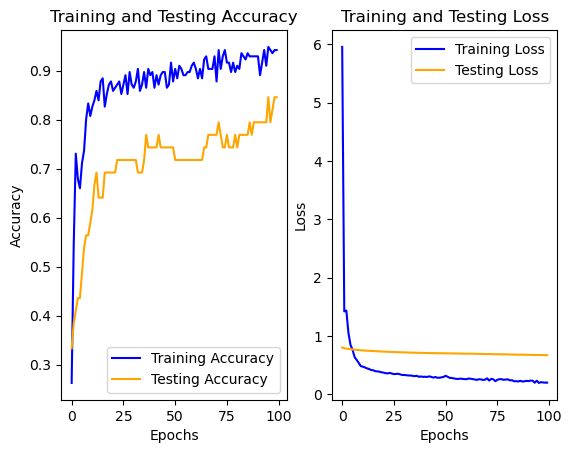

<Figure size 1200x600 with 0 Axes>

In [34]:
# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history_l2.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_l2.history['val_accuracy'], label='Testing Accuracy', color='orange')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history_l2.history['loss'], label='Training Loss', color='blue')
plt.plot(history_l2.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Plot training and testing accuracy and loss
plt.figure(figsize=(12, 6))
plt.tight_layout()
plt.show()

In [35]:
# Evaluate the model on the testing set
loss, accuracy = model_l2.evaluate(X_test_scaled, y_test)
print("Classification Loss:", loss)
print("Classification Accuracy:", accuracy)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC Score:", auc_score)

# Generate confusion matrix
y_pred = np.round(y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("")
print("Classification Report:")
print(classification_report(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8558 - loss: 0.6750 
Classification Loss: 0.6728277802467346
Classification Accuracy: 0.8461538553237915
AUC Score: 0.8794642857142857
Confusion Matrix:
[[ 4  3]
 [ 3 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.91      0.91      0.91        32

    accuracy                           0.85        39
   macro avg       0.74      0.74      0.74        39
weighted avg       0.85      0.85      0.85        39



## Dropout Regularization

In [36]:
# Define the feedforward neural network model with dropout regularization
model_dropout = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with dropout regularization
model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with dropout regularization
history_dropout = model_dropout.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))


Epoch 1/100


C:\Users\Sabesh Rajan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.6723 - loss: 12.3516 - val_accuracy: 0.7692 - val_loss: 0.6709
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6854 - loss: 11.2253 - val_accuracy: 0.6923 - val_loss: 0.6756
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6426 - loss: 12.0277 - val_accuracy: 0.6154 - val_loss: 0.6802
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6443 - loss: 9.8689 - val_accuracy: 0.5897 - val_loss: 0.6848
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6212 - loss: 8.9698 - val_accuracy: 0.5641 - val_loss: 0.6884
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6476 - loss: 5.0948 - val_accuracy: 0.4872 - val_loss: 0.6907
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5743 - loss: 7.8304 - val_accuracy: 0.4615 - val_loss: 0.6919
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6195 - loss: 8.1386 - val_accuracy: 0.4615 - val_loss: 0.6924
E

Epoch 52/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6831 - loss: 0.9617 - val_accuracy: 0.8205 - val_loss: 0.6717
Epoch 53/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6299 - loss: 1.0558 - val_accuracy: 0.8205 - val_loss: 0.6709
Epoch 54/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6704 - loss: 1.1621 - val_accuracy: 0.8205 - val_loss: 0.6701
Epoch 55/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6690 - loss: 0.7365 - val_accuracy: 0.8205 - val_loss: 0.6695
Epoch 56/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6298 - loss: 1.1794 - val_accuracy: 0.8205 - val_loss: 0.6688
Epoch 57/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7041 - loss: 1.1600 - val_accuracy: 0.8205 - val_loss: 0.6680
Epoch 58/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6953 - loss: 0.9798 - val_accuracy: 0.8205 - val_loss: 0.6672
Epoch 59/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6711 - loss: 0.9723 - val_accuracy: 0.8205 - v

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001D6BA836DE0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


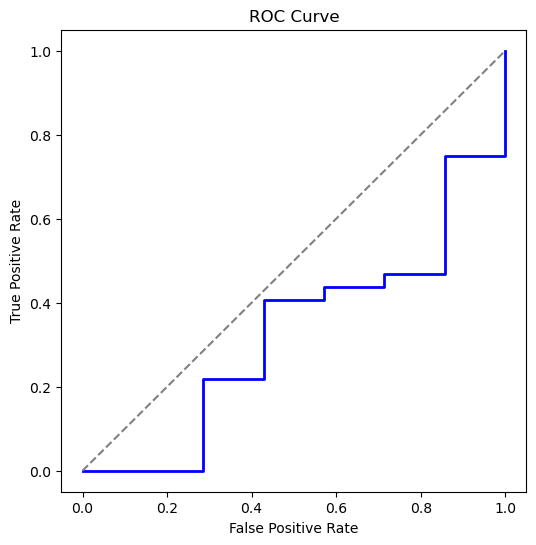

In [37]:
# Generate ROC curve
y_pred_prob = model_dropout.predict(X_test_scaled).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

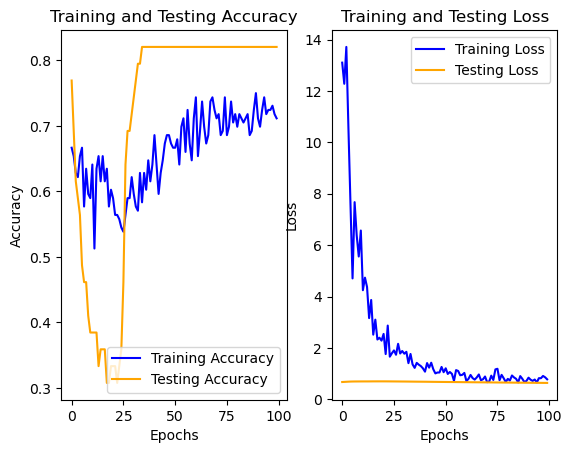

<Figure size 1200x600 with 0 Axes>

In [38]:
# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history_dropout.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_dropout.history['val_accuracy'], label='Testing Accuracy', color='orange')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history_dropout.history['loss'], label='Training Loss', color='blue')
plt.plot(history_dropout.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Plot training and testing accuracy and loss
plt.figure(figsize=(12, 6))
plt.tight_layout()
plt.show()

In [39]:
# Evaluate the model on the testing set
loss, accuracy = model_dropout.evaluate(X_test_scaled, y_test)
print("Classification Loss:", loss)
print("Classification Accuracy:", accuracy)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC Score:", auc_score)

# Generate confusion matrix
y_pred = np.round(y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("")
print("Classification Report:")
print(classification_report(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8387 - loss: 0.6199 
Classification Loss: 0.6357278227806091
Classification Accuracy: 0.8205128312110901
AUC Score: 0.3258928571428572
Confusion Matrix:
[[ 0  7]
 [ 0 32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.82      1.00      0.90        32

    accuracy                           0.82        39
   macro avg       0.41      0.50      0.45        39
weighted avg       0.67      0.82      0.74        39



C:\Users\Sabesh Rajan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sabesh Rajan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sabesh Rajan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Early Stopping

In [40]:
# Use the unregularized model (classification_model in this example)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history_early_stopping = classification_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2595 - loss: 290.8011 - val_accuracy: 0.9231 - val_loss: 0.8137
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5604 - loss: 56.7718 - val_accuracy: 0.8462 - val_loss: 1.3052
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7275 - loss: 94.7624 - val_accuracy: 0.9487 - val_loss: 0.6942
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5929 - loss: 29.0391 - val_accuracy: 0.9487 - val_loss: 0.4462
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2889 - loss: 31.9995 - val_accuracy: 0.9487 - val_loss: 0.4083
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7535 - loss: 10.5145 - val_accuracy: 0.9487 - val_loss: 0.3860
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7692 - loss: 15.6170 - val_accuracy: 0.9487 - val_loss: 0.3335
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6063 - loss: 5.7597 - val_accuracy: 0.9231 - v

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


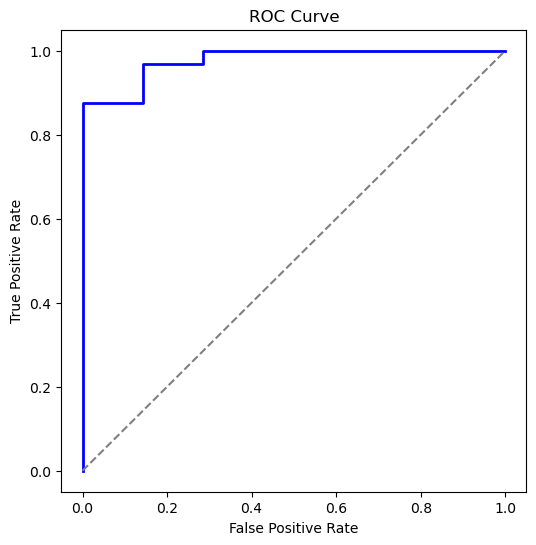

In [41]:
# Generate ROC curve
y_pred_prob = classification_model.predict(X_test_scaled).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

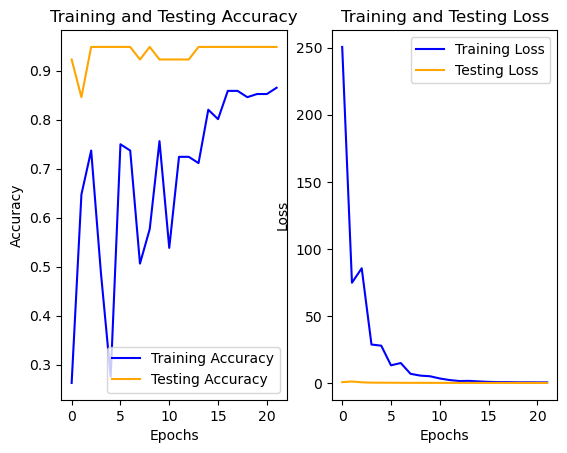

<Figure size 1200x600 with 0 Axes>

In [42]:
# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history_early_stopping.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_early_stopping.history['val_accuracy'], label='Testing Accuracy', color='orange')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history_early_stopping.history['loss'], label='Training Loss', color='blue')
plt.plot(history_early_stopping.history['val_loss'], label='Testing Loss', color='orange')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Plot training and testing accuracy and loss
plt.figure(figsize=(12, 6))
plt.tight_layout()
plt.show()

In [43]:
# Evaluate the model on the testing set
loss, accuracy = classification_model.evaluate(X_test_scaled, y_test)
print("Classification Loss:", loss)
print("Classification Accuracy:", accuracy)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC Score:", auc_score)

# Generate confusion matrix
y_pred = np.round(y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("")
print("Classification Report:")
print(classification_report(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9554 - loss: 0.1898 
Classification Loss: 0.24291658401489258
Classification Accuracy: 0.9487179517745972
AUC Score: 0.9776785714285714
Confusion Matrix:
[[ 6  1]
 [ 1 31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.97      0.97      0.97        32

    accuracy                           0.95        39
   macro avg       0.91      0.91      0.91        39
weighted avg       0.95      0.95      0.95        39

